In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
insurance = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/OzvzVqK4pgg4x7qEadoZMRyVR/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
insurance['charges'] = round(insurance['charges'], 2)

In [121]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [122]:
def define_bmi_group(bmi):
    if (bmi < 18.5):
        return 'Underweight'
    elif (bmi >= 18.5 and bmi < 24.9):
        return 'Normal'
    elif (bmi >= 25 and bmi < 29.9):
        return 'Overweight'
    else:
        return 'Obese'
     
insurance['BMI_group']  = insurance['bmi'].apply(define_bmi_group)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92,Overweight
1,18,male,33.770,1,no,southeast,1725.55,Obese
2,28,male,33.000,3,no,southeast,4449.46,Obese
3,33,male,22.705,0,no,northwest,21984.47,Normal
4,32,male,28.880,0,no,northwest,3866.86,Overweight


In [123]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

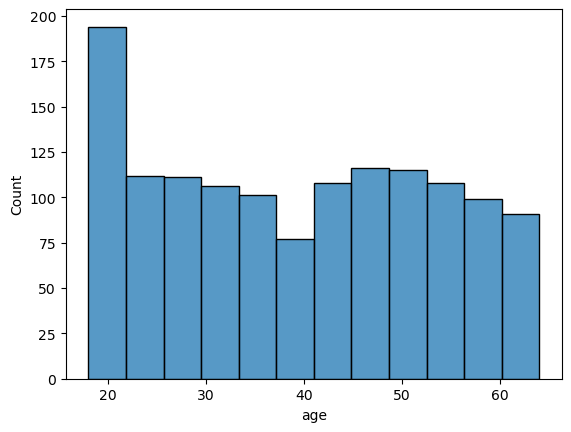

In [124]:
sns.histplot(insurance['age'])
plt.show()

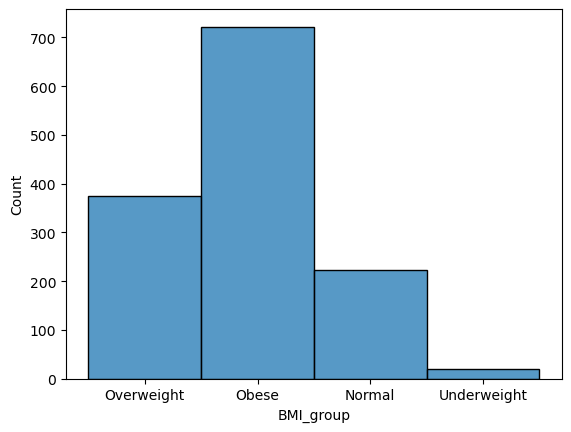

In [125]:
sns.histplot(insurance['BMI_group'])
plt.show()

In [126]:
bmi_group_df = insurance['BMI_group'].value_counts().reset_index()
bmi_group_df

,index,BMI_group
0,Obese,722
1,Overweight,374
2,Normal,222
3,Underweight,20


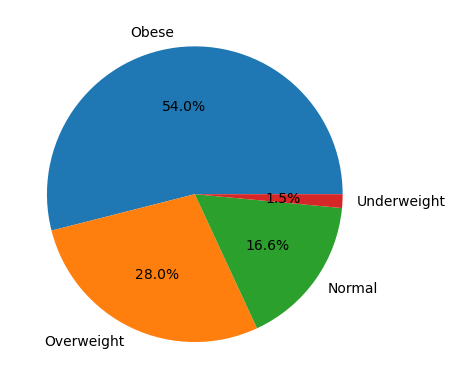

In [127]:
plt.pie(x=bmi_group_df['BMI_group'], labels = bmi_group_df['index'], autopct='%1.1f%%')
plt.show()

In [128]:
insurance.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
BMI_group    0
dtype: int64

### Handling Categorical Variables
#### Description
- Encode all categorical features such that they can be used in a regression model.
- i.e.
- sex, BMI_group, smoker and region should be labelled properly.

- Note: Use the label encoder for all features. You can read more about it here.

- The output should have first five rows of the resulting dataframe. 

In [129]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [130]:
insurance['BMI_group'].value_counts()

Obese          722
Overweight     374
Normal         222
Underweight     20
Name: BMI_group, dtype: int64

In [131]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [132]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [133]:
# encode  binary  vars to 0 and 1

bin_vars = ['sex', 'smoker']
is_bin_vars_encoded = False

print(is_bin_vars_encoded)

False


In [134]:
if not is_bin_vars_encoded:
    insurance[bin_vars] = insurance[bin_vars].apply(lambda x: x.str.lower().map({'male': 1, 'female':0,  'yes': 1, 'no': 0}))
    is_bin_vars_encoded = True
    print('bin vars are not encoded')
    print(is_bin_vars_encoded)
else:
    print('bin vars are already encoded')

insurance[bin_vars].head()

bin vars are not encoded
True


,sex,smoker
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [135]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,0,27.900,0,1,southwest,16884.92,Overweight
1,18,1,33.770,1,0,southeast,1725.55,Obese
2,28,1,33.000,3,0,southeast,4449.46,Obese
3,33,1,22.705,0,0,northwest,21984.47,Normal
4,32,1,28.880,0,0,northwest,3866.86,Overweight


In [136]:
# encode categorial vars'region'
cat_vars = ['region', 'BMI_group']

is_dummy_vars_created_for_cat_vars = False

print(is_dummy_vars_created_for_cat_vars)

False


In [137]:
if not is_dummy_vars_created_for_cat_vars:
    dummy_vars_df = pd.get_dummies(insurance[cat_vars], drop_first= True)
    # concatnate dummy_df to original dataframe
    insurance =   pd.concat([insurance, dummy_vars_df], axis=1)
    is_dummy_vars_created_for_cat_vars = True
    print(is_dummy_vars_created_for_cat_vars)
else:
    print('dummy vars are created for cat vars')
       
insurance.head(5)

True


,age,sex,bmi,children,smoker,region,charges,BMI_group,region_northwest,region_southeast,region_southwest,BMI_group_Obese,BMI_group_Overweight,BMI_group_Underweight
0,19,0,27.900,0,1,southwest,16884.92,Overweight,0,0,1,0,1,0
1,18,1,33.770,1,0,southeast,1725.55,Obese,0,1,0,1,0,0
2,28,1,33.000,3,0,southeast,4449.46,Obese,0,1,0,1,0,0
3,33,1,22.705,0,0,northwest,21984.47,Normal,1,0,0,0,0,0
4,32,1,28.880,0,0,northwest,3866.86,Overweight,1,0,0,0,1,0


In [138]:
# Interpretation of dummy varibles

# Region
 # southeast    364  010
 # southwest    325  001
 # northwest    325  100
 # northeast    324  000

# BMI_group
 # Obese          722   100
 # Overweight     374   010
 # Normal         222   000
 # Underweight     20   001

In [139]:
is_cat_vars_dropped = False
print(is_cat_vars_dropped)

False


In [147]:
# delete region and bmi_group driver vars only if is_dummy_vars_created_for_cat_vars
if (not is_cat_vars_dropped and is_dummy_vars_created_for_cat_vars):
    insurance = insurance.drop(labels=['region', 'BMI_group'], axis=1)
    is_cat_vars_dropped = True
else:
    print("Vars '{0}' and '{1}' already droped or dummy vars are not created for cat vars."
          .format(cat_vars[0], cat_vars[1]))

insurance.head()

Vars 'region' and 'BMI_group' already droped or dummy vars are not created for cat vars.


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,BMI_group_Obese,BMI_group_Overweight,BMI_group_Underweight
0,19,0,27.900,0,1,16884.92,0,0,1,0,1,0
1,18,1,33.770,1,0,1725.55,0,1,0,1,0,0
2,28,1,33.000,3,0,4449.46,0,1,0,1,0,0
3,33,1,22.705,0,0,21984.47,1,0,0,0,0,0
4,32,1,28.880,0,0,3866.86,1,0,0,0,1,0


In [166]:

insurance2 = pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/OzvzVqK4pgg4x7qEadoZMRyVR/insurance.csv")
insurance2['BMI_group']  = insurance2['bmi'].apply(define_bmi_group)

insurance2.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [169]:
from sklearn.preprocessing import LabelEncoder

le_bmi_group = LabelEncoder()



le_bmi_group.fit(bmi_group)
print(le_bmi_group.classes_)

print()
le_region = LabelEncoder()
le_region.fit(insurance2['region'])
print(le_region.classes_)

insurance2['BMI_group_encoded'] = le_bmi_group.transform(insurance2['BMI_group'])
insurance2['region_encoded'] = le_region.transform(insurance2['region'])

insurance2.head()


['Normal' 'Obese' 'Overweight' 'Underweight']

['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges,BMI_group,BMI_group_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,2,3
1,18,male,33.770,1,no,southeast,1725.55230,Obese,1,2
2,28,male,33.000,3,no,southeast,4449.46200,Obese,1,2
3,33,male,22.705,0,no,northwest,21984.47061,Normal,0,1
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,2,1


In [155]:
insurance2.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [170]:
# custom_order
custom_bmi_group = ['Underweight', 'Normal', 'Overweight', 'Obese']

insurance2['BMI_group_encoded'] = pd.Categorical(insurance2['BMI_group'], categories=custom_bmi_group, ordered=True).codes

insurance2.head(10)

,age,sex,bmi,children,smoker,region,charges,BMI_group,BMI_group_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,2,3
1,18,male,33.770,1,no,southeast,1725.55230,Obese,3,2
2,28,male,33.000,3,no,southeast,4449.46200,Obese,3,2
3,33,male,22.705,0,no,northwest,21984.47061,Normal,1,1
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,2,1
5,31,female,25.740,0,no,southeast,3756.62160,Overweight,2,2
6,46,female,33.440,1,no,southeast,8240.58960,Obese,3,2
7,37,female,27.740,3,no,northwest,7281.50560,Overweight,2,1
8,37,male,29.830,2,no,northeast,6406.41070,Overweight,2,0
9,60,female,25.840,0,no,northwest,28923.13692,Overweight,2,1


In [172]:

# Create a DataFrame with ordinal categorical variable
df = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Define the custom order
custom_order = ['Small', 'Medium', 'Large']

# Create a dictionary to map categories to encoded values
encoding_map = {category: code for code, category in enumerate(custom_order)}

# Apply label encoding using the mapping
df['Size_encoded'] = df['Size'].map(encoding_map)

# Print the updated DataFrame
df

,Size,Size_encoded
0,Small,0
1,Medium,1
2,Large,2
3,Medium,1
4,Small,0


In [176]:

pd.set_option('display.max_columns', 500)

df =pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/831JKKEkW7kqd5M4evNva9LyB/insurance_grouped.csv")
le = LabelEncoder()#use this encoder to encode values
cat_vars = ['sex', 'BMI_group', 'smoker', 'region']
df['sex'] = le.fit_transform(df['sex'])
df['BMI_group'] = le.fit_transform(df['BMI_group'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

print(df.head())


   age  sex     bmi  children  smoker  region      charges  BMI_group
0   19    0  27.900         0       1       3  16884.92400          2
1   18    1  33.770         1       0       2   1725.55230          1
2   28    1  33.000         3       0       2   4449.46200          1
3   33    1  22.705         0       0       1  21984.47061          0
4   32    1  28.880         0       0       1   3866.85520          2


In [ ]:

   age  sex     bmi  children  smoker  region      charges  BMI_group
0   19    0  27.900         0       1       3  16884.92400          2
1   18    1  33.770         1       0       2   1725.55230          1
2   28    1  33.000         3       0       2   4449.46200          1
3   33    1  22.705         0       0       1  21984.47061          0
4   32    1  28.880         0       0       1   3866.85520          2

In [197]:

df3 =pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/B5yO4wkEbQk4dVGn8140yV1bx/insurance_encoded.csv")
_vars = ['smoker', 'bmi', 'age', 'charges']
corr_df = df3[_vars].corr()['smoker']
corr_df = corr_df.round(4)
for value in corr_df.values[1:]:
    print("{:0.4f}".format(value))

0.0038
-0.0250
0.7873


In [185]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 500)
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/831JKKEkW7kqd5M4evNva9LyB/insurance_grouped.csv")
le = LabelEncoder()
#sex
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
#changing data type
df.BMI_group=df.BMI_group.astype(str)
le.fit(df.BMI_group.drop_duplicates()) 
df.BMI_group = le.transform(df.BMI_group)
print(df.head())

   age  sex     bmi  children  smoker  region      charges  BMI_group
0   19    0  27.900         0       1       3  16884.92400          2
1   18    1  33.770         1       0       2   1725.55230          1
2   28    1  33.000         3       0       2   4449.46200          1
3   33    1  22.705         0       0       1  21984.47061          0
4   32    1  28.880         0       0       1   3866.85520          2


In [186]:
import pandas as pd 
df=pd.read_csv("https://media-doselect.s3.amazonaws.com/generic/B5yO4wkEbQk4dVGn8140yV1bx/insurance_encoded.csv")
print("{:0.4f}".format(round(df['smoker'].corr(df['bmi']), 4)))
print("{:0.4f}".format(round(df['smoker'].corr(df['age']), 4)))
print("{:0.4f}".format(round(df['smoker'].corr(df['charges']), 4)))

0.0038
-0.0250
0.7873


In [199]:
insurance2.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,BMI_group_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,2,3
1,18,male,33.770,1,no,southeast,1725.55230,Obese,3,2
2,28,male,33.000,3,no,southeast,4449.46200,Obese,3,2
3,33,male,22.705,0,no,northwest,21984.47061,Normal,1,1
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,2,1


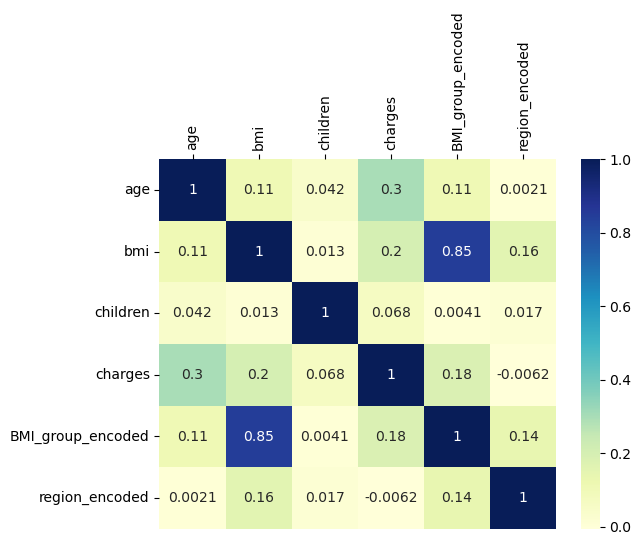

In [202]:
ax = sns.heatmap(insurance2.corr(), annot=True, cmap='YlGnBu')
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# encoding
